<a href="https://colab.research.google.com/github/charlie-aashutosh/IIT-JODHPUR-AI-/blob/main/Image_Classification_using_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[:5] #Array of 2 dimention

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5] #Array of 1 dimention -- flattening takes place

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

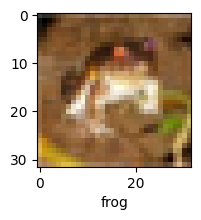

In [11]:
plot_sample(x_train,y_train,0)

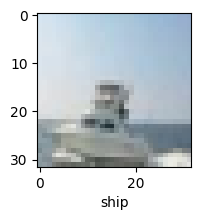

In [17]:
plot_sample(x_train,y_train,100)

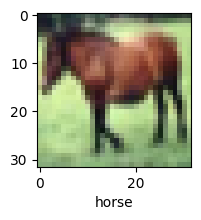

In [12]:
plot_sample(x_train,y_train,7)

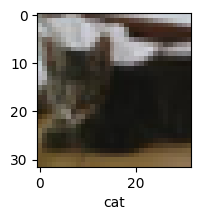

In [13]:
plot_sample(x_train,y_train,9)

In [18]:
#Normalization will take place and the pixel values will be between 0 to 1, by dividing the pixels/255
x_train=x_train/255.0
x_test=x_test/255.0

CNN Model

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') #last layer
])

In [22]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', #because we have multiple categories in the o/p
            metrics=['accuracy'])

In [25]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7742 - accuracy: 0.7297
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7192 - accuracy: 0.7482
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6749 - accuracy: 0.7627
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6314 - accuracy: 0.7777
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5989 - accuracy: 0.7881
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5609 - accuracy: 0.8035
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.5277 - accuracy: 0.8153
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.4984 - accuracy: 0.8232
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.4664 - accuracy: 0.8368
Epoch 10/10
1563/1563 [==============================] - 55s 35m

In [26]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0686 - accuracy: 0.6873


[1.0685847997665405, 0.6873000264167786]